In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [3]:
def PolinomiosLaguerre(n):
    
    x = sym.Symbol('x',Real=True)
    y = sym.Symbol('y',Real=True)
    y = ((np.e**-x*x**n))
    p = sym.diff(y,x,n)*(np.e**x/(np.math.factorial(n)))
    return p

def GetNewtonMethod(f,df,xn,itmax = 100000, precision=1e-12):
    error = 1
    it = 0
    
    while error > precision and it < itmax:
        
        try:
            xn1 = xn - f(xn)/df(xn)
            error = np.abs(f(xn)/df(xn))

        except ZeroDivisionError:
            print("zero division")    
        xn  = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

def GetAllRoots(f,df,x, tolerancia=9):
    
    Roots = np.array([])
    for i in x:
        root = GetNewtonMethod(f,df,i)
          
        if root != False:
            croot = np.round( root, tolerancia ) 
            
            if croot not in Roots:
                Roots = np.append( Roots, croot )

    Roots.sort()
    
    return Roots

def GetRootsPolynomial(xi,pol,dpol):

    x = sym.Symbol('x',Real=True)
    
    pn = sym.lambdify([x],pol,'numpy')
    dpn = sym.lambdify([x],dpol,'numpy')
    Roots = GetAllRoots(pn,dpn,xi,tolerancia=8)
    
    return Roots

In [4]:

def pesosLaguerre(puntos):
    
    xi=np.linspace(0,100,1000)
    x = sym.Symbol('x',Real=True)
    pesos= []

    ln=PolinomiosLaguerre(puntos+1)
    ln2=PolinomiosLaguerre(puntos)
    lnx = sym.lambdify([x],ln2,'numpy')  
    dln=sym.diff(ln,x)
    
    
    xi=np.linspace(0,100,1000)
    raices= GetRootsPolynomial(xi, ln, dln)
    
    
    for i in raices:
    
        weight= i/((puntos+1)**2 * (lnx(i)**2))
        
        pesos.append(weight)     
    return pesos

In [5]:
def GausLaguerre(funcion,puntos):
    
    pesos = pesosLaguerre(puntos)
    x = sym.Symbol('x',Real=True)
    xi=np.linspace(0,100,1000)              
     
    f=sym.lambdify([x],funcion,'numpy')
    integral=0

    
    funl=PolinomiosLaguerre(puntos+1)
    
    dfunl=sym.diff(funl,x)
    
    raices= GetRootsPolynomial(xi,funl,dfunl)
    
        
    for i in range(len(pesos)):
                       
        xn=pesos[i]*(f(raices[i]))
        
        integral += xn
        
    return integral

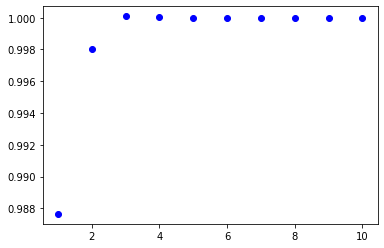

In [6]:
x = sym.Symbol('x',Real=True)
f= ((x**3)/(np.e**x - 1))* np.e**(x)

p=11
valores=[]
puntos=[]
for i in range(1,p):
    
    derivada=GausLaguerre(f,i)
    error=derivada/((np.pi**4)/15)
    puntos.append(i)
    valores.append(error)
    

plt.scatter(puntos,valores,color='b')

plt.show() 